

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. you can download it from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv).  


### Question(s) for Analysis
> 1-Is budget effects on the revenue of film? <br>
>2-IS there any relationship between revenue and vote_average? <br>
3-what is the average budget for last 25 years? <br>



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install pandas==0.24.2
#!pip install  pandas==0.25.0

In [21]:
# import CSV data into pandas dataframe.
df=pd.read_csv('tmdb-movies.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [22]:
# genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
# genres_df.head(10)

> We will drop columns that we will not use in out investigation 

In [23]:
#Drop unused column
df.drop(['imdb_id','cast','director'],axis=True,inplace=True)


>drop rows that have null value

In [24]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 10819
Data columns (total 18 columns):
id                      2000 non-null int64
popularity              2000 non-null float64
budget                  2000 non-null int64
revenue                 2000 non-null int64
original_title          2000 non-null object
homepage                2000 non-null object
tagline                 2000 non-null object
keywords                2000 non-null object
overview                2000 non-null object
runtime                 2000 non-null int64
genres                  2000 non-null object
production_companies    2000 non-null object
release_date            2000 non-null object
vote_count              2000 non-null int64
vote_average            2000 non-null float64
release_year            2000 non-null int64
budget_adj              2000 non-null float64
revenue_adj             2000 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 296.9+ KB


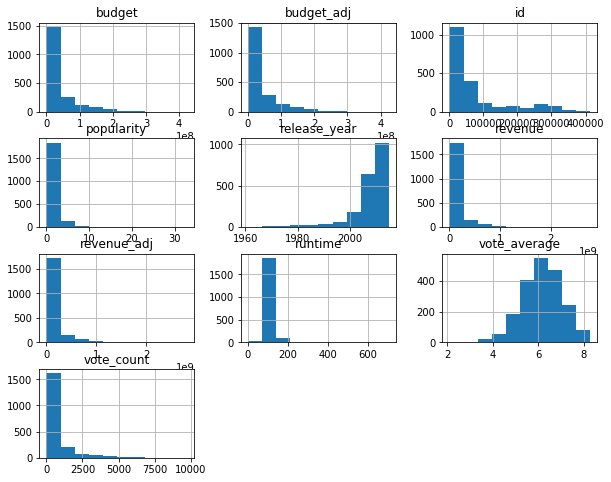

In [25]:
df.hist(figsize=(10, 8));

### In which area the vote_average found?

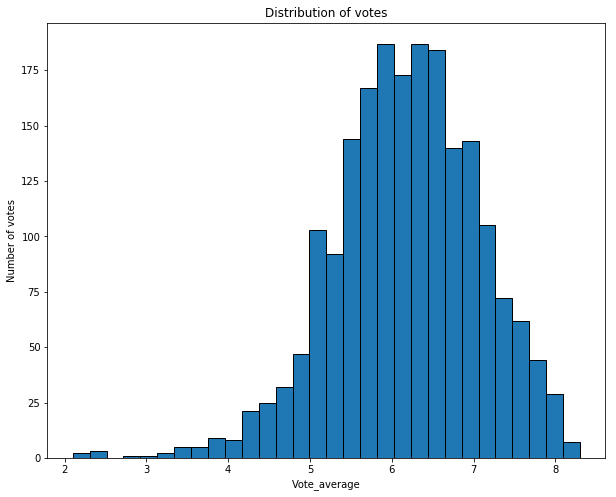

In [26]:
df['vote_average'].hist(grid=False,bins=30,edgecolor='black',figsize=[10,8]).set(xlabel="Vote_average", ylabel="Number of votes",title='Distribution of votes');

> As we can see most of votes found between 4 and 8.




### Research Question 1 (Is budget effects on revenue?)

In [27]:
#declare function that takes dataframe and x,y variable to generate bar chart
def MyGropPlot(df,grpVar,yVar):
    df.groupby(grpVar)[yVar].mean().plot.bar(edgecolor='black',figsize=[14,8],rot=0,width=0.7);
    #Add title and format it
    plt.title(f'Distribution of {yVar} by {grpVar}'.title(),fontsize=14, weight="bold")
    #Add X label and format it
    plt.xlabel(grpVar.title(),fontsize=10,weight="bold")
    #Add y label and format it
    plt.ylabel(yVar.title(),fontsize=10,weight="bold")

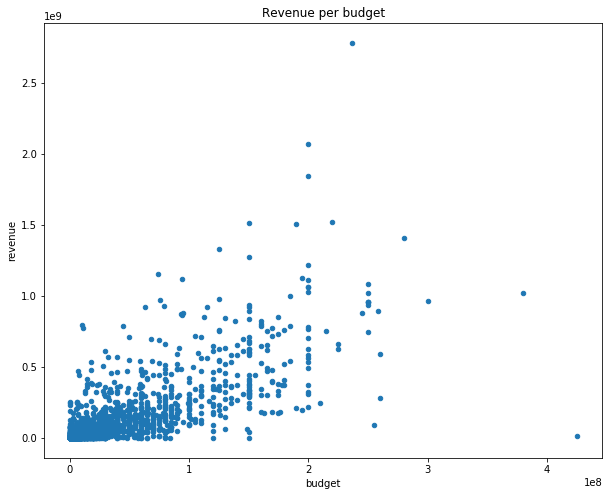

In [28]:
# df['revenue'].plot(figsize=(10, 8),alpha=1 , label='revenue')
# df['budget'].plot(figsize=(10, 8),alpha=1 , label='budget')
# plt.legend();
df.plot(kind='scatter',y='revenue',x='budget',figsize=[10,8],title='Revenue per budget');


>We notice that the revenue increases by increasing the budget.

### Research Question 2  (what is the size of budget in last 25 year!)

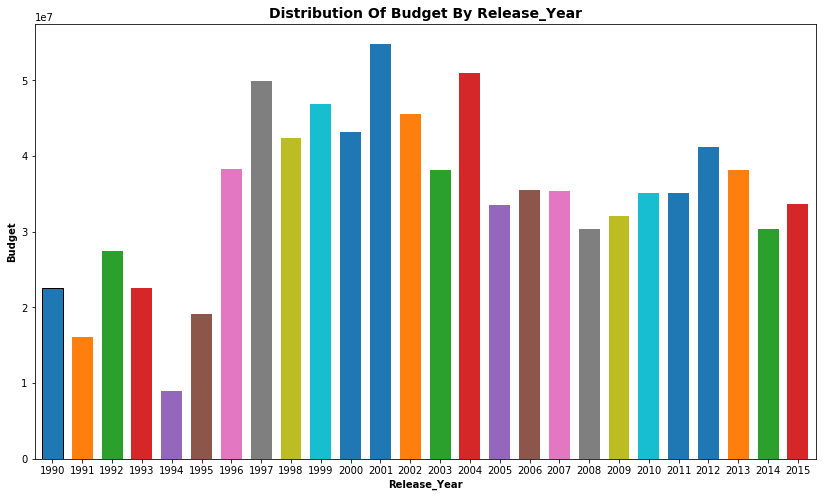

In [29]:
#Create Dataframes that contains data of release year equal or more than 1990
budget_release_year=df.query('release_year>=1990')
#call plot function
MyGropPlot(budget_release_year,'release_year','budget')
#df.groupby('release_year').budget.mean().plot(kind='bar');

### Research Question 3  (Is there any relationship between revenue and vote_average!)

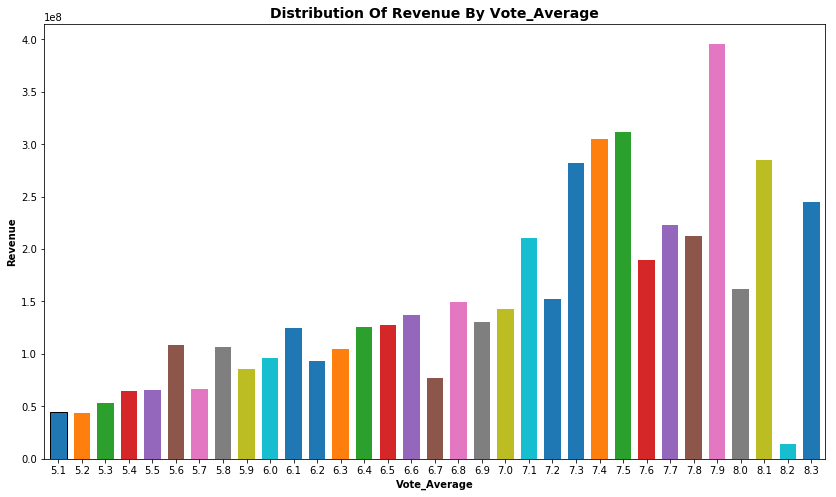

In [30]:
#create Dataframe that contain vote_average equal or more than 5.0
VotePerRevenue=df.query('vote_average>5.0')
#call plot function
MyGropPlot(VotePerRevenue,'vote_average','revenue')
# VotePerRevenue.groupby('vote_average').revenue.mean().plot(kind='bar',figsize=(10, 8));

<a id='conclusions'></a>
## Conclusions

> According to sammary statistics we found that the revenue increase by increasing of vote average and the budget increase from  year 2000 at the end the revenue increases by increasing budget.

### Limitations
>we remove unnessesary column for us like "imdb_id, cast, director" and drop all record that have null values to make our data clear



In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0